### *Fadlila Agustina (21083010050)*

### Bootsrap Mean dan Resample

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import scipy.stats as st

In [6]:
#bootstrap mean dengan pengembalian
def btmean(data, r=100, k=2, alpha=0.05):
    list_1=[]
    mean_true = np.repeat(np.mean(data),r)
    print("start bootstrapping")
    for i in range(r):
        list_2=[]
        for j in range (k):
            list_2.append(random.sample(data, 1))
        mean_sample = np.mean(list_2)
        list_1.append(mean_sample)
    print("end boostraping")
    mean_resamp = np.mean(list_1)
    var_mean_resamp = np.var(list_1)
    mse_mean_resamp = mean_squared_error(list_1, mean_true)
    ci_mean_resamp = [np.mean(data) - st.norm.ppf(1-alpha/2)*var_mean_resamp**0.5, np.mean(data) + st.norm.ppf(1-alpha/2)*var_mean_resamp**0.05]
    return list_1, mean_resamp, var_mean_resamp, mse_mean_resamp, ci_mean_resamp

In [7]:
sample = [7, 11, 8, 30]

In [8]:
resample, mean_resample, var_resample, mse_resample, ci_mean_resample = btmean(list(sample), r=1000, k=70)

start bootstrapping
end boostraping


In [9]:
print("Mean sesungguhnya  : ", np.mean(sample))
print("Mean bootstrap     : ", mean_resample)
print("Var mean bootstrap : ", var_resample)
print("Error bootstrap    : ", mse_resample)
print("CI mean bootstrap  : ", ci_mean_resample)

Mean sesungguhnya  :  14.0
Mean bootstrap     :  13.987400000000001
Var mean bootstrap :  1.1730873624489795
Error bootstrap    :  1.1732461224489796
CI mean bootstrap  :  [11.877179518676995, 15.975670926081749]


start bootstrapping
end boostraping


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


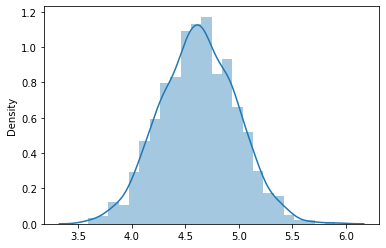

Mean Bootstrap:  4.623222884229407


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


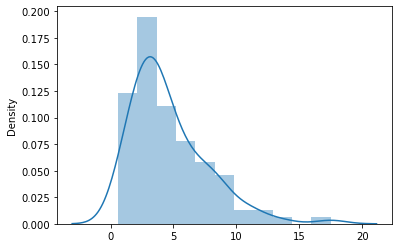

Mean True:  4.6218540648483835


In [10]:
#Chisquare - bootstrap - Normal
sample2 = np.random.chisquare(5, 100)
resample, mean_resample, _, _, _ = btmean(list(sample2), r=1000, k=70)
sns.distplot(resample)
plt.show()
print("Mean Bootstrap: ", mean_resample)
sns.distplot(sample2)
plt.show()
print("Mean True: ", np.mean(sample2))

start bootstrapping
end boostraping


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


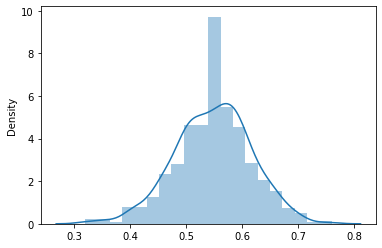

C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.54828


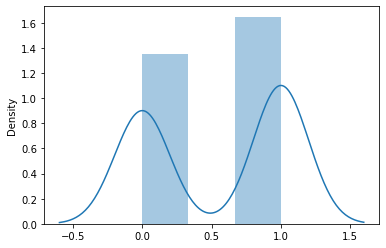

0.55


In [11]:
#Binomial to Normal
sample3 = np.random.binomial(1,0.5,100)
resample, mean_sample, _, _, _ = btmean(data = list(sample3), r = 1000, k = 50)
sns.distplot(resample, bins=20)
plt.show()
print(mean_sample)
sns.distplot(sample3)
plt.show()
print(np.mean(sample3))

start bootstrapping
end boostraping


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


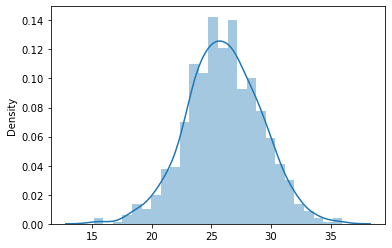

26.03275


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


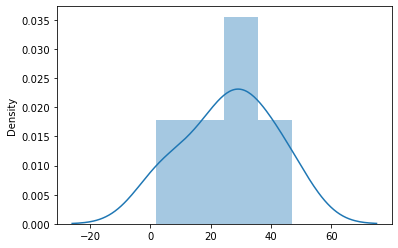

26.0


In [12]:
#Membangkitkan sample buatan
list_1 = list(np.random.randint(1, high=50, size=10))
resample, mean_sample, _, _, _ = btmean(data=list_1, r = 1000, k = 20)
sns.distplot(resample)
plt.show()
print(mean_sample)
sns.distplot(list_1)
plt.show()
print(np.mean(list_1))

In [13]:
#bootstrap variance
def btvar(data, r=100, k=2):
    import random
    import numpy as np
    list_1 = []
    for i in range(r):
        list_2 = []
        for j in range(k):
            list_2.append(random.sample(data, 1))
            var_sample = np.var(list_2)
            list_1.append(var_sample)        
    var_resamp = np.mean(list_1)
    return list_1, var_resamp

In [14]:
#Bootstrap variance
_, var_resample = btvar(data=list(sample), r = 500, k = 50)
print(var_resample)
print(np.var(sample))

78.12562912588581
87.5


### Median

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import median_absolute_error
import scipy.stats as st

In [16]:
#Bootstrap median dengan pengembalian 
def btmedian(data, r=100, k=2, alpha=0.05):
    list_1 = []
    median_true = np.repeat(np.median(data), r)
    print("start bootstrapping")
    for i in range(r):
        list_2 = []
        for j in range(k):
            list_2.append(random.sample(data, 1))
        median_sample = np.median(list_2)
        list_1.append(median_sample)
    print("end bootstrapping")
    median_resamp = np.median(list_1)
    var_median_resamp = np.var(list_1)
    mse_median_resamp = median_absolute_error(list_1, median_true)
    ci_median_resamp = [np.median(data) - st.norm.ppf(1-alpha/2)*var_median_resamp**0.5, np.median(data) + st.norm.ppf(1-alpha/2)*var_median_resamp**0.5]
    return list_1, median_resamp, var_median_resamp, mse_median_resamp, ci_median_resamp

In [17]:
sample = [7, 11, 8, 30]

In [18]:
resample, median_resample, var_median_resample, mse_median_resample, ci_median_resample = btmedian(list(sample), r=1000, k = 70)

start bootstrapping
end bootstrapping


In [19]:
print("Median Sesungguhnya  : ", np.median(sample))
print("Median Bootstrap     : ", median_resample)
print("Var Median Bootstrap : ", var_median_resample)
print("Error Bootstrap      : ", mse_median_resample)
print("CI Median Bootstrap  : ", ci_median_resample)

Median Sesungguhnya  :  9.5
Median Bootstrap     :  9.5
Var Median Bootstrap :  2.0557709999999996
Error Bootstrap      :  1.5
CI Median Bootstrap  :  [6.689811458055317, 12.310188541944683]


start bootstrapping
end bootstrapping


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


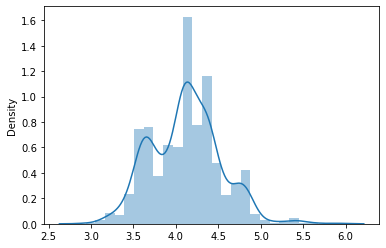

C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


median Bootstrap:  4.09899421107345


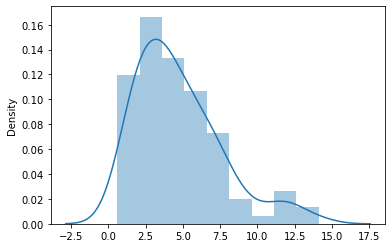

Median True:  4.092051312631201


In [20]:
#Chisquare - bootstrap - Normal
sample2 = np.random.chisquare(5, 100)
resample, median_resample, _, _, _ = btmedian(list(sample2), r=1000, k=70)
sns.distplot(resample)
plt.show()
print("median Bootstrap: ", median_resample)
sns.distplot(sample2)
plt.show()
print("Median True: ", np.median(sample2))

start bootstrapping
end bootstrapping


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


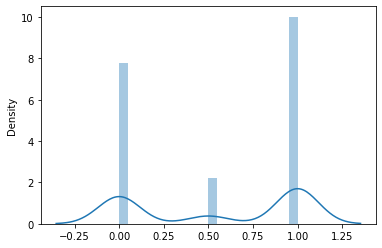

C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.0


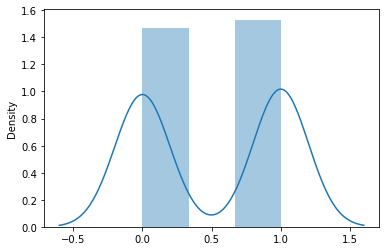

1.0


In [21]:
#Binomial to Normal
sample3 = np.random.binomial(1,0.5,100)
resample, median_sample, _, _, _ = btmedian(data = list(sample3), r = 1000, k = 50)
sns.distplot(resample, bins=20)
plt.show()
print(median_sample)
sns.distplot(sample3)
plt.show()
print(np.median(sample3))

start bootstrapping
end bootstrapping


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


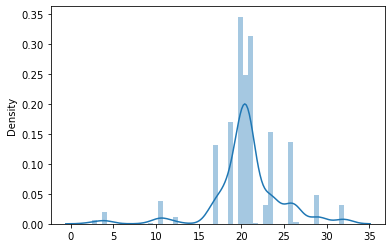

C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


20.5


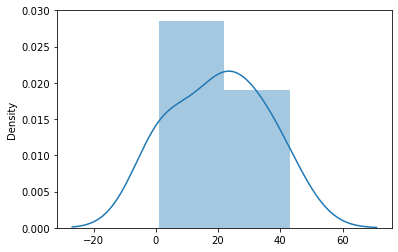

20.5


In [22]:
#Membangkitkan sampple buatan
list_1 = list(np.random.randint(1, high=50, size=10))
resample, median_sample, _, _, _ = btmedian(data=list_1, r = 1000, k =20)
sns.distplot(resample)
plt.show()
print(median_sample)
sns.distplot(list_1)
plt.show()
print(np.median(list_1))

In [23]:
#Bootstrap variance
def btvar(data, r=100, k=2):
    import random
    import numpy as np
    list_1 = []
    for i in range(k):
        list_2 = []
        for j in range(k):
            list_2.append(random.sample(data, 1))
        var_sample = np.var(list_2)
        list_1.append(var_sample)
    var_resamp = np.median(list_1)
    return list_1, var_resamp

In [24]:
_, var_resample = btvar(data=list(sample), r = 500, k = 50)
print(var_resample)
print(np.var(sample))

86.05
87.5


### Jacknife

#### *Standart Error Mean*

In [25]:
import numpy as np
sample = [7, 11, 8, 30]

In [26]:
theta_list = []
resample_list = []
for index, i in enumerate(sample):
    sample_copy = sample.copy()
    del sample_copy[index]
    resample_list.append(sample_copy)
    theta_list.append(np.median(sample_copy))

In [27]:
resample_list

[[11, 8, 30], [7, 8, 30], [7, 11, 30], [7, 11, 8]]

In [28]:
theta_list

[11.0, 8.0, 11.0, 8.0]

In [29]:
n=4
(n/n-1*(sum(theta_list - np.mean(theta_list))))**2

1.0

#### *Standart Error Varians*

In [30]:
sample = [7, 11, 8, 30]

In [31]:
theta_list = []
resample_list = []
for index, i in enumerate(sample):
    sample_copy = sample.copy()
    del sample_copy[index]
    resample_list.append(sample_copy)
    theta_list.append(np.median(sample_copy))

In [32]:
resample_list

[[11, 8, 30], [7, 8, 30], [7, 11, 30], [7, 11, 8]]

In [33]:
theta_list

[11.0, 8.0, 11.0, 8.0]

In [34]:
n=4
(n/n-1*(sum(theta_list - np.var(theta_list))))**2

784.0

### Binom

In [3]:
import numpy as np

In [4]:
x = 0
for i in range(102):
    u = np.random.uniform(0,1)
    if u<0.5: 
        x = x + 1

In [5]:
print(x)

56
